# Exploring the data

In [1]:
import random
from pathlib import Path

import matplotlib as plt
import music21
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
filename = "DoubleJig0001-0365.abc"
data_url = f"http://www.norbeck.nu/abc/book/oneills/1001/{filename}"
data_path = Path("..", "data")
file_path = Path(data_path, filename)

In [3]:
assert file_path.exists(), (
    "Download {filename} and put it in the data_path. You can go to the home dir and "
    "execute: wget {data_url} -P data/"
)

# Raw data

The file is just a text file containing the data and metadata

In [4]:
! head -58 {str(file_path)}

% These tunes are from "The Dance Music of Ireland", published by Francis O'Neill in 1907.
% They were originally transcribed in ABC format by Frank Nordberg (frnordbe@online.no) and
% hosted at his site www.musicaviva.com
% That site is down since July 2019, so the tunes were fetched from John Chambers' mirror
% at http://trillian.mit.edu/~jc/music/book/oneills/1001/ where he had also corrected some errors.
% Henrik Norbeck has then proofread the ABC format tunes against the original book and corrected
% more errors. Henrik Norbeck has also made the following changes:
% - removed all m: fields (non-standard ABC and is not in the original book)
% - replaced "  ~"N by ~ to stick closer to the original book and the ABC standard.
% - changed W to S (for Segno) to adhere to the ABC standard.
% - removed two comments which were not part of the original book
% - changed transcription comments using % to W: for consistency
% - removed C:anon. which is true for most tunes, but not for others
%

The package [music21](http://web.mit.edu/music21/doc/) can read the whole lot into a container class.

In [5]:
# This is a class containing all the separate jigs
oneills_opus = music21.converter.parse(str(file_path.resolve()))

In [6]:
# contains 365 scores as expected
len(list(oneills_opus.scores))

365

In [7]:
# All scores have a single part
sum(len(list(score.parts.stream())) for score in oneills_opus.scores)

365

In [8]:
random.seed(1337)
score = random.choice(oneills_opus.scores)

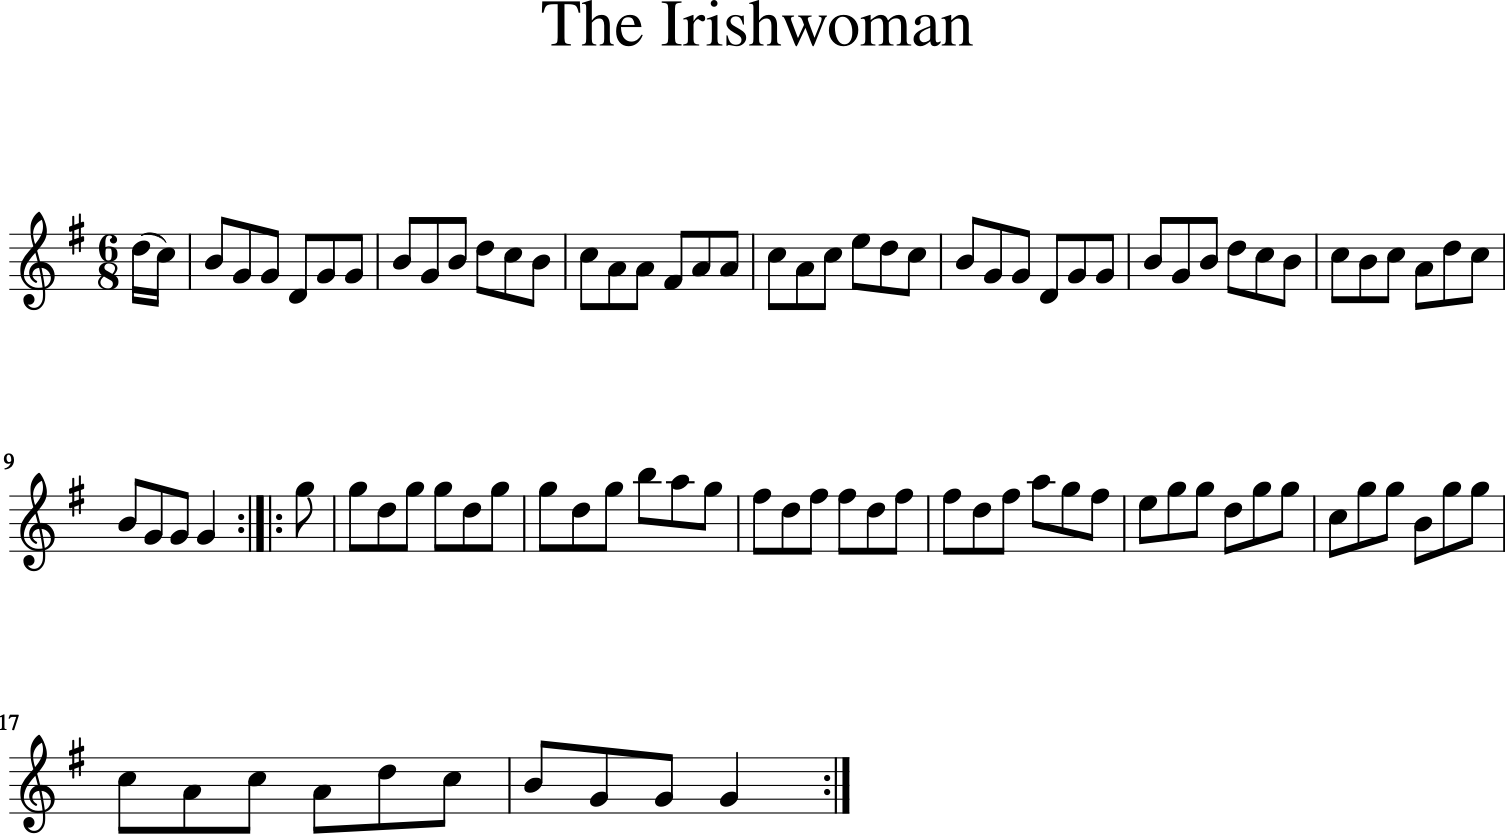

In [9]:
score.show()

In [10]:
score = oneills_opus.getScoreByTitle("The piper's picnic")

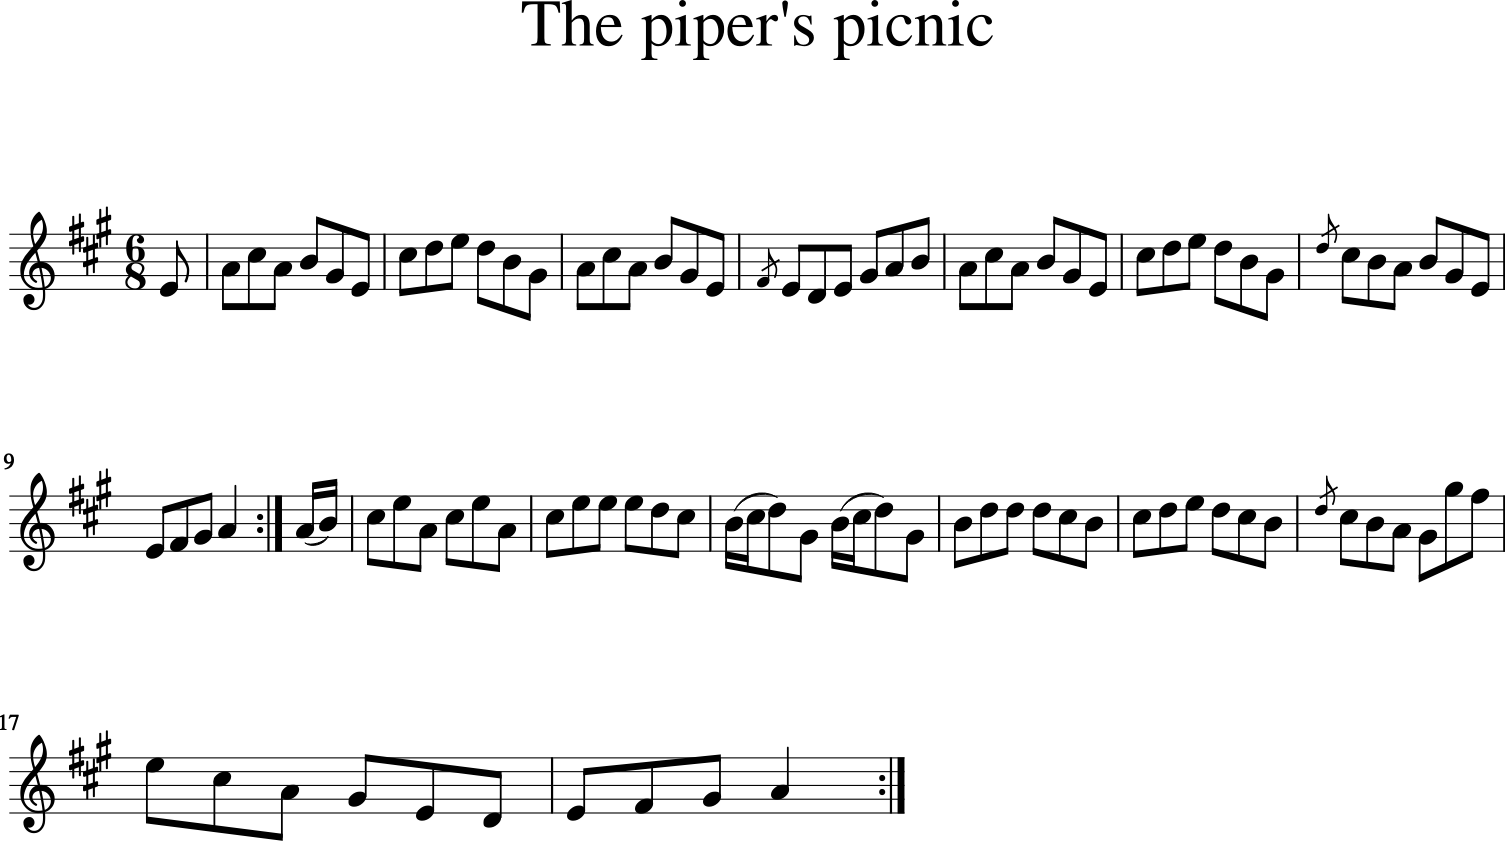

In [11]:
score.show()

In [12]:
score.show('text')

{0.0} <music21.metadata.Metadata object at 0x7fae90848640>
{0.0} <music21.stream.Part 0x7fae90848790>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of A major>
        {0.0} <music21.meter.TimeSignature 6/8>
        {0.0} <music21.note.Note E>
    {0.5} <music21.stream.Measure 1 offset=0.5>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note C#>
        {1.0} <music21.note.Note A>
        {1.5} <music21.note.Note B>
        {2.0} <music21.note.Note G#>
        {2.5} <music21.note.Note E>
    {3.5} <music21.stream.Measure 2 offset=3.5>
        {0.0} <music21.note.Note C#>
        {0.5} <music21.note.Note D>
        {1.0} <music21.note.Note E>
        {1.5} <music21.note.Note D>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note G#>
    {6.5} <music21.stream.Measure 3 offset=6.5>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note C#>
        {1.0} <music21.note.No

```
X:2
T:The piper's picnic
O:Ireland
B:Francis O'Neill: "The Dance Music of Ireland" (1907) no. 2
R:Double jig
Z:Transcribed by Frank Nordberg - http://www.musicaviva.com
F:http://www.musicaviva.com/abc/tunes/ireland/oneill-1001/oneill-1001-0002.abc
M:6/8
L:1/8
K:A
E|AcA BGE|cde dBG|\
AcA BGE|{F}EDE GAB|AcA BGE|cde dBG|{d}cBA BGE|EFG A2:|
(A/B/)|ceA ceA|cee edc|(B/c/d)G (B/c/d)G|Bdd dcB|\
cde dcB|{d}cBA Ggf|ecA GED|EFGA2:|
```

In [13]:
meta = score.metadata
# there is only one part to each jig so index 0 works
first_measure = score.parts[0].measure(0)
second_measure = score.parts[0].measure(1)

In [14]:
# for attr_name in meta.searchAttributes:
#     print(f"{attr_name}: {getattr(meta, attr_name)}")

('2',
 "The piper's picnic",
 'Ireland',
 None,
 None,
 None,
 None,
 '<music21.meter.TimeSignature 6/8>',
 0.5,
 'A major',
 None)

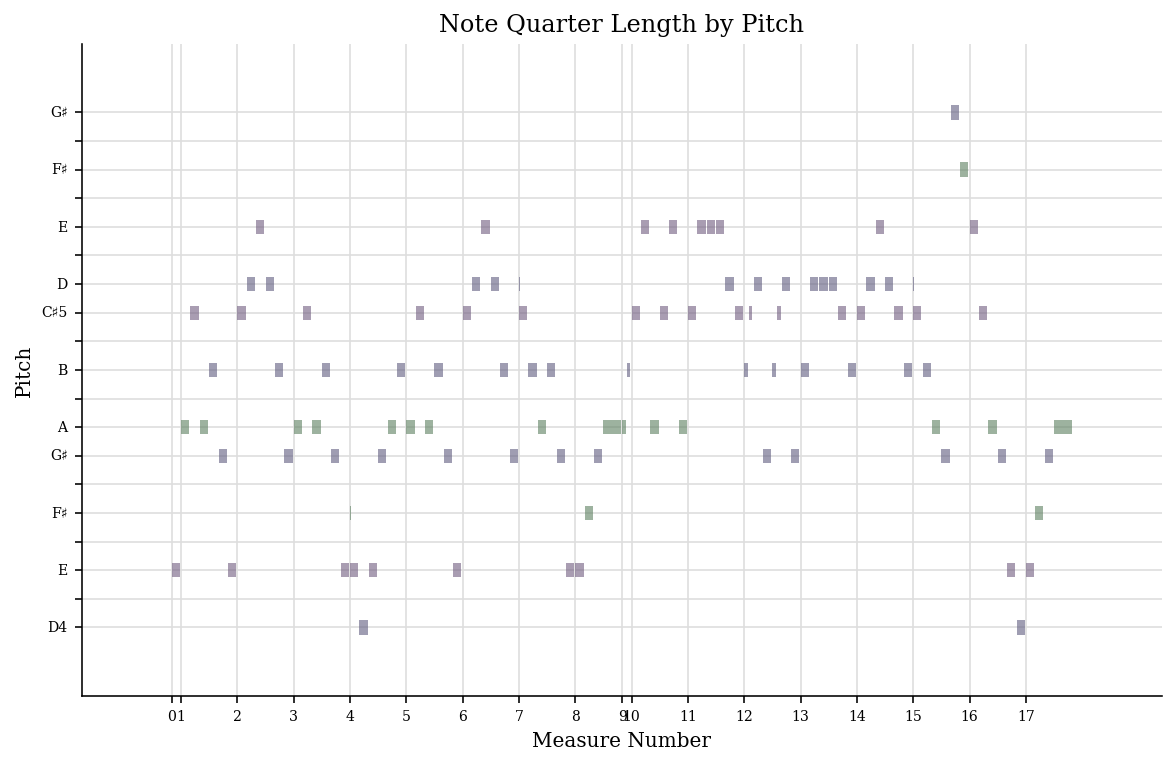

In [15]:
(
    meta.number,  # X:2
    meta.title,  # T:The piper's picnic
    meta.localeOfComposition,  # O:Ireland
    None,  # B:Francis O'Neill: "The Dance Music of Ireland" (1907) no. 2
    None,  # R:Double jig
    None,  # Z:Transcribed by Frank Nordberg - http://www.musicaviva.com
    None,  # F:http://www.musicaviva.com/abc/tunes/ireland/oneill-1001/oneill-1001-0002.abc
    str(first_measure.timeSignature),  # M:6/8
    second_measure.offset,  # L:1/8
    str(first_measure.keySignature), # K:A
    score.plot(),  # E|AcA BGE|cde dBG|\
           # AcA BGE|{F}EDE GAB|AcA BGE|cde dBG|{d}cBA BGE|EFG A2:|
           # (A/B/)|ceA ceA|cee edc|(B/c/d)G (B/c/d)G|Bdd dcB|\
           # cde dcB|{d}cBA Ggf|ecA GED|EFGA2:|
)

TODO:
* Plot all keys and time signatures in the opus

Questions:
* what can we do with `.analyze()`
* extract pianorolls?